Nama : Putri Amelia Suhendi
Nim : 1103213195
Tugas ML

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import warnings
from wordcloud import WordCloud
from collections import Counter

# Mengabaikan warning yang tidak perlu
warnings.filterwarnings('ignore')

# Setting untuk visualisasi yang lebih baik
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

In [ ]:
import pandas as pd

# Proses pemuatan dataset
print("Memulai pemuatan data...")
file_name = 'netflix_titles.csv'
data = pd.read_csv(file_name)

# Informasi terkait dataset
print("Informasi tentang dataset:")
print(f"Baris dataset: {len(data)}")
print(f"Kolom dataset: {data.columns.size}")
print("Beberapa contoh data awal:")
# Menampilkan 5 baris pertama dengan .iloc
print(data.iloc[:5])


Memulai pemuatan data...
Informasi tentang dataset:
Baris dataset: 8807
Kolom dataset: 12
Beberapa contoh data awal:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021     

In [ ]:
# Informasi detail tentang dataset
print("Informasi tipe data:")
df.info()

Informasi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Statistik deskriptif
print("Statistik deskriptif:")
df.describe()

Statistik deskriptif:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


📊 Visualisasi kolom dengan data yang hilang



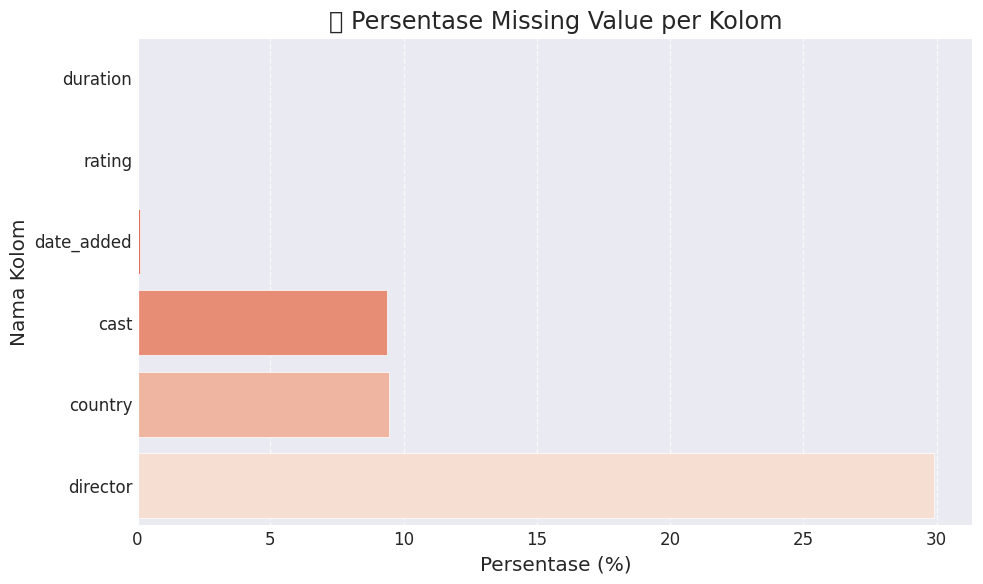

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Visualisasi kolom dengan data yang hilang\n")

# Hitung missing values dan persentasenya
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

# Buat DataFrame ringkasan dan filter hanya yang ada missing-nya
missing_df = pd.DataFrame({
    'Kolom': missing_count.index,
    'Jumlah Kosong': missing_count.values,
    'Persentase': missing_percent.values
})

missing_df = missing_df[missing_df['Jumlah Kosong'] > 0].sort_values('Persentase', ascending=True)

# Plot horizontal bar
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df, x='Persentase', y='Kolom', palette='Reds_r')

plt.title('🔧 Persentase Missing Value per Kolom')
plt.xlabel('Persentase (%)')
plt.ylabel('Nama Kolom')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


feature engineering

In [ ]:
# Tahap transformasi kolom tanggal
print(" Memproses informasi waktu dari kolom 'date_added'...\n")

# Konversi kolom 'date_added' ke format datetime, abaikan error jika ada
df['tanggal_ditambahkan'] = pd.to_datetime(df['date_added'], errors='coerce')

# Ambil tahun, bulan angka, dan nama bulan dari kolom waktu
df['tahun_tambah'] = df['tanggal_ditambahkan'].dt.year
df['bulan_tambah'] = df['tanggal_ditambahkan'].dt.month
df['nama_bulan'] = df['tanggal_ditambahkan'].dt.strftime('%B')

# Menampilkan hasil ekstraksi untuk beberapa baris awal
print(df[['tanggal_ditambahkan', 'tahun_tambah', 'bulan_tambah', 'nama_bulan']].sample(5))


 Memproses informasi waktu dari kolom 'date_added'...

     tanggal_ditambahkan  tahun_tambah  bulan_tambah nama_bulan
2614          2020-04-28        2020.0           4.0      April
4669          2018-09-01        2018.0           9.0  September
3679          2019-07-09        2019.0           7.0       July
6100          2019-07-12        2019.0           7.0       July
3034          2020-01-10        2020.0           1.0    January


In [ ]:
#  Memproses informasi durasi konten
print(" Memisahkan nilai durasi dan jenisnya...\n")

# Fungsi untuk mengekstrak angka dari durasi
def ekstrak_nilai_durasi(durasi_str):
    if pd.isna(durasi_str):
        return np.nan
    angka = re.findall(r'\d+', durasi_str)
    return int(angka[0]) if angka else np.nan

# Fungsi untuk mengekstrak jenis durasi (Menit atau Season)
def ekstrak_jenis_durasi(durasi_str):
    if pd.isna(durasi_str):
        return np.nan
    if 'Season' in durasi_str:
        return 'Season'
    return 'Minute'

# Terapkan fungsi ekstraksi pada kolom 'duration'
df['durasi_angka'] = df['duration'].apply(ekstrak_nilai_durasi)
df['durasi_jenis'] = df['duration'].apply(ekstrak_jenis_durasi)

# Tampilkan hasil ekstraksi untuk 10 baris pertama
print(df[['duration', 'durasi_angka', 'durasi_jenis']].head(10))


🔍 Memisahkan nilai durasi dan jenisnya...

    duration  durasi_angka durasi_jenis
0     90 min          90.0       Minute
1  2 Seasons           2.0       Season
2   1 Season           1.0       Season
3   1 Season           1.0       Season
4  2 Seasons           2.0       Season
5   1 Season           1.0       Season
6     91 min          91.0       Minute
7    125 min         125.0       Minute
8  9 Seasons           9.0       Season
9    104 min         104.0       Minute


In [ ]:
# Menghitung jumlah sutradara dan pemeran dalam dataset
print(" Memulai perhitungan jumlah sutradara dan pemeran...\n")

# Fungsi untuk menghitung jumlah sutradara, memeriksa jika ada lebih dari satu nama
def hitung_sutradara_unik(directors):
    # Cek jika tidak ada nilai
    if pd.isna(directors):
        return 0
    # Pisahkan berdasarkan koma, bersihkan spasi ekstra, dan gunakan set untuk menghindari duplikasi
    return len(set([director.strip() for director in directors.split(',') if director.strip()]))

# Fungsi untuk menghitung jumlah pemeran unik
def hitung_pemeran_unik(cast):
    # Cek jika tidak ada nilai
    if pd.isna(cast):
        return 0
    # Pisahkan berdasarkan koma, bersihkan spasi ekstra, dan gunakan set untuk menghindari duplikasi
    return len(set([actor.strip() for actor in cast.split(',') if actor.strip()]))

# Terapkan kedua fungsi pada kolom 'director' dan 'cast'
df['sutradara_terhitung'] = df['director'].apply(hitung_sutradara_unik)
df['pemeran_terhitung'] = df['cast'].apply(hitung_pemeran_unik)

# Menampilkan hasil perhitungan
print(df[['director', 'sutradara_terhitung', 'cast', 'pemeran_terhitung']].head())


🔍 Memulai perhitungan jumlah sutradara dan pemeran...

          director  sutradara_terhitung  \
0  Kirsten Johnson                    1   
1              NaN                    0   
2  Julien Leclercq                    1   
3              NaN                    0   
4              NaN                    0   

                                                cast  pemeran_terhitung  
0                                                NaN                  0  
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...                 19  
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...                  9  
3                                                NaN                  0  
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...                  8  


In [ ]:
#  Menghitung jumlah genre dan negara yang terdaftar
print(" Menghitung total genre dan negara yang terdaftar...\n")

# Fungsi untuk menghitung jumlah genre dalam kolom 'listed_in'
def hitung_total_genre(genre_data):
    if pd.isna(genre_data):  # Cek apakah nilai genre kosong
        return 0
    # Pisahkan berdasarkan koma dan hitung jumlah genre unik
    genre_split = genre_data.split(', ')
    return len(genre_split)

# Fungsi untuk menghitung jumlah negara dalam kolom 'country'
def hitung_total_negara(negara_data):
    if pd.isna(negara_data):  # Cek apakah nilai negara kosong
        return 0
    # Pisahkan berdasarkan koma dan hitung jumlah negara unik
    negara_split = negara_data.split(', ')
    return len(negara_split)

# Terapkan fungsi perhitungan ke dalam kolom 'listed_in' dan 'country'
df['jumlah_genre_unik'] = df['listed_in'].apply(hitung_total_genre)
df['jumlah_negara_unik'] = df['country'].apply(hitung_total_negara)

# Menampilkan beberapa baris pertama hasil ekstraksi
print(df[['listed_in', 'jumlah_genre_unik', 'country', 'jumlah_negara_unik']].head())


🔎 Menghitung total genre dan negara yang terdaftar...

                                           listed_in  jumlah_genre_unik  \
0                                      Documentaries                  1   
1    International TV Shows, TV Dramas, TV Mysteries                  3   
2  Crime TV Shows, International TV Shows, TV Act...                  3   
3                             Docuseries, Reality TV                  2   
4  International TV Shows, Romantic TV Shows, TV ...                  3   

         country  jumlah_negara_unik  
0  United States                   1  
1   South Africa                   1  
2            NaN                   0  
3            NaN                   0  
4          India                   1  


In [ ]:
#  Menghitung usia konten berdasarkan tahun rilis
print(" Menghitung usia konten dari tahun rilis...\n")

# Impor modul datetime untuk mendapatkan tahun sekarang
from datetime import datetime

# Mendapatkan tahun saat ini
tahun_aktual = datetime.today().year

# Fungsi untuk menghitung umur konten
def hitung_umur_konten(tahun_rilis):
    """Menghitung umur konten dengan mengurangi tahun rilis dari tahun sekarang"""
    return tahun_aktual - tahun_rilis

# Terapkan fungsi untuk menghitung umur konten di kolom 'release_year'
df['umur_konten'] = df['release_year'].apply(hitung_umur_konten)

# Menampilkan hasil perhitungan umur konten
print(df[['title', 'release_year', 'umur_konten']].head())


 Menghitung usia konten dari tahun rilis...

                   title  release_year  umur_konten
0   Dick Johnson Is Dead          2020            5
1          Blood & Water          2021            4
2              Ganglands          2021            4
3  Jailbirds New Orleans          2021            4
4           Kota Factory          2021            4


In [ ]:
#  Buat kamus mapping untuk mengelompokkan rating ke dalam kategori
rating_mapping = {
    'G': 'Anak',
    'TV-G': 'Anak',
    'PG': 'Anak Besar',
    'TV-PG': 'Anak Besar',
    'TV-Y': 'Anak Besar',
    'TV-Y7': 'Anak Besar',
    'TV-Y7-FV': 'Anak Besar',
    'PG-13': 'Remaja',
    'TV-14': 'Remaja',
    'R': 'Dewasa',
    'TV-MA': 'Dewasa',
    'NC-17': 'Dewasa',
    'UR': 'Dewasa',
    'NR': 'Dewasa'
}

# 🎯 Terapkan mapping ke kolom rating
df['kategori_rating'] = df['rating'].map(rating_mapping)

# Ganti nilai NaN (rating tidak dikenal) dengan 'Lainnya'
df['kategori_rating'] = df['kategori_rating'].fillna('Lainnya')

# 🖨️ Lihat hasil kategorisasi
print(df[['rating', 'kategori_rating']].head(10))


  rating kategori_rating
0  PG-13          Remaja
1  TV-MA          Dewasa
2  TV-MA          Dewasa
3  TV-MA          Dewasa
4  TV-MA          Dewasa
5  TV-MA          Dewasa
6     PG      Anak Besar
7  TV-MA          Dewasa
8  TV-14          Remaja
9  PG-13          Remaja


In [ ]:
# Daftar fitur hasil rekayasa
fitur_baru = [
    'added_year', 'added_month', 'duration_value', 'duration_unit',
    'director_count', 'cast_count', 'genre_count', 'country_count',
    'content_age', 'rating_category'
]

# Cek kolom yang benar-benar ada di DataFrame
fitur_tersedia = [f for f in fitur_baru if f in df.columns]

# Tampilkan daftar fitur yang berhasil ditemukan
print("Fitur hasil rekayasa yang tersedia dalam DataFrame:")
for fitur in fitur_tersedia:
    print("-", fitur)

# Tampilkan 5 baris pertama dari kolom yang tersedia
print("\nCuplikan data:")
df[fitur_tersedia].head()


Fitur hasil rekayasa yang tersedia dalam DataFrame:

Cuplikan data:


""
0
1
2
3
4


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

Exploratory Data Analysis (EDA)

- Membuat grafik batang distribusi konten Netflix...
      Tipe  Jumlah
0    Movie    6131
1  TV Show    2676


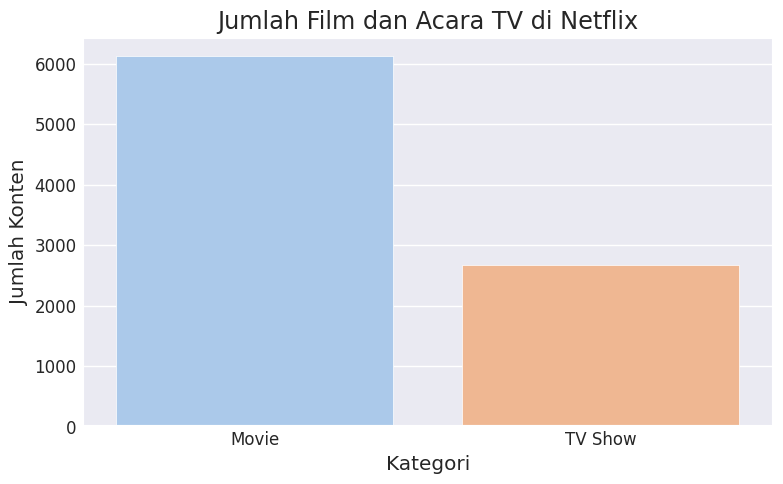

In [ ]:
# Visualisasi distribusi tipe konten dengan bar chart
print("- Membuat grafik batang distribusi konten Netflix...")

# Hitung frekuensi masing-masing tipe
tipe_konten = df['type'].value_counts().reset_index()
tipe_konten.columns = ['Tipe', 'Jumlah']

# Tampilkan hasil hitungan
print(tipe_konten)

# Plot menggunakan seaborn
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(data=tipe_konten, x='Tipe', y='Jumlah', palette='pastel')
plt.title('Jumlah Film dan Acara TV di Netflix')
plt.ylabel('Jumlah Konten')
plt.xlabel('Kategori')
plt.tight_layout()
plt.show()


- Menghitung distribusi rating berdasarkan jenis konten (Movie vs TV Show)...
       type    rating  count
0     Movie    66 min      1
1     Movie    74 min      1
2     Movie    84 min      1
3     Movie         G     41
4     Movie     NC-17      3
5     Movie        NR     75
6     Movie        PG    287
7     Movie     PG-13    490
8     Movie         R    797
9     Movie     TV-14   1427
10    Movie      TV-G    126
11    Movie     TV-MA   2062
12    Movie     TV-PG    540
13    Movie      TV-Y    131
14    Movie     TV-Y7    139
15    Movie  TV-Y7-FV      5
16    Movie        UR      3
17  TV Show        NR      5
18  TV Show         R      2
19  TV Show     TV-14    733
20  TV Show      TV-G     94
21  TV Show     TV-MA   1145
22  TV Show     TV-PG    323
23  TV Show      TV-Y    176
24  TV Show     TV-Y7    195
25  TV Show  TV-Y7-FV      1


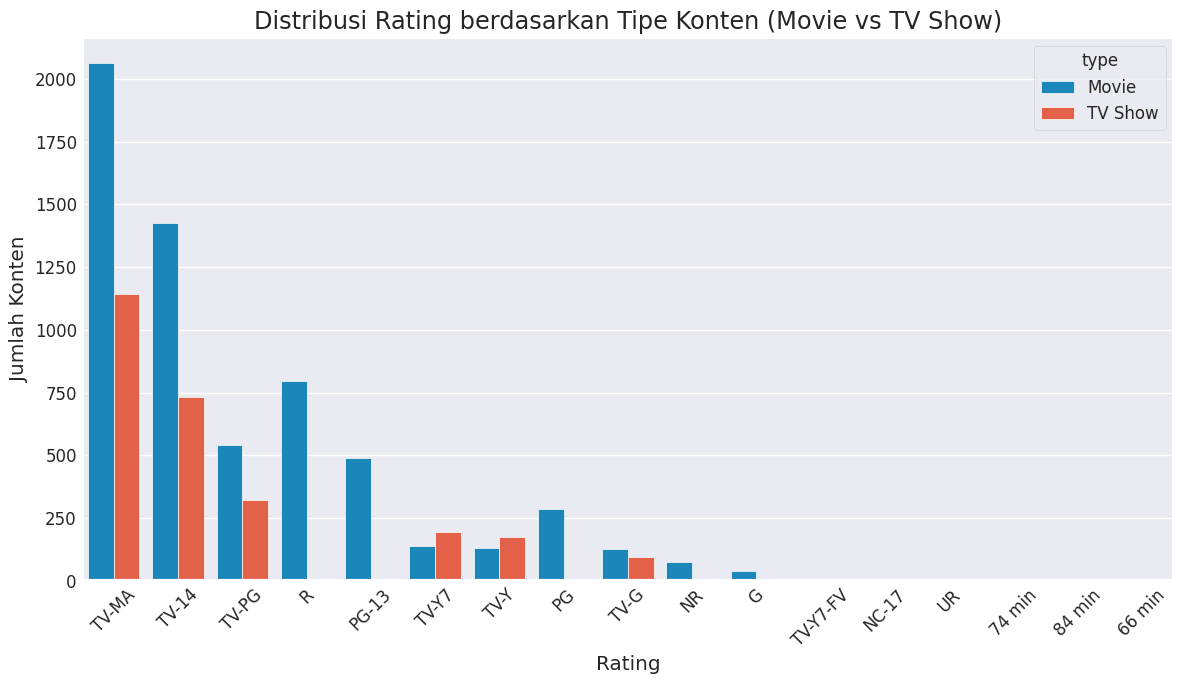

In [ ]:
# Menghitung distribusi rating berdasarkan jenis konten
print("- Menghitung distribusi rating berdasarkan jenis konten (Movie vs TV Show)...")

# Mengelompokkan data berdasarkan tipe konten dan rating
rating_distribution = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Menampilkan distribusi rating berdasarkan tipe konten
print(rating_distribution)

# Visualisasi menggunakan countplot
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index)
plt.title('Distribusi Rating berdasarkan Tipe Konten (Movie vs TV Show)')
plt.xlabel('Rating')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Memeriksa kolom 'date_added' dan ekstraksi tahun...
added_year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


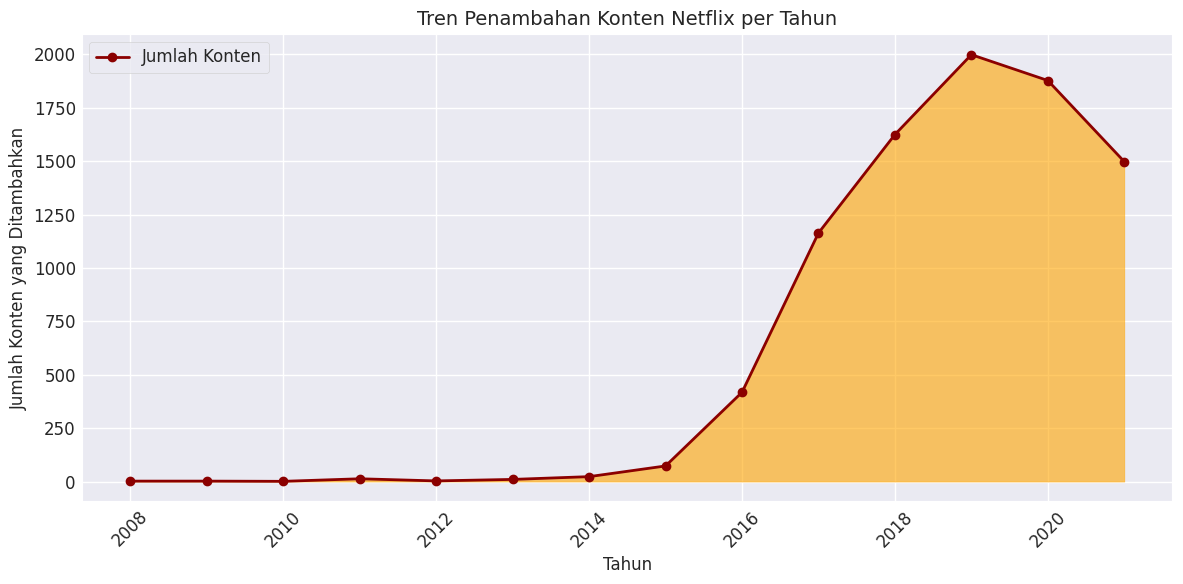

In [ ]:
# Jika kolom yang sesuai adalah 'date_added', ekstrak tahun dari kolom tersebut
print("- Memeriksa kolom 'date_added' dan ekstraksi tahun...")

# Pastikan kolom 'date_added' ada
if 'date_added' in df.columns:
    # Ubah kolom 'date_added' ke tipe datetime
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

    # Ekstrak tahun dari 'date_added' menjadi 'added_year'
    df['added_year'] = df['date_added'].dt.year

    # Hapus baris yang memiliki NaN pada kolom 'added_year'
    df = df.dropna(subset=['added_year'])

    # Hitung tren penambahan konten per tahun
    yearly_additions = df['added_year'].value_counts().sort_index()

    # Tampilkan hasil perhitungan
    print(yearly_additions)

    # Visualisasi dengan plot untuk tren penambahan konten menggunakan area plot
    plt.figure(figsize=(12, 6))
    plt.fill_between(yearly_additions.index, yearly_additions.values, color='orange', alpha=0.6)
    plt.plot(yearly_additions.index, yearly_additions.values, marker='o', color='darkred', linewidth=2, label='Jumlah Konten')

    # Tambahkan judul dan label
    plt.title('Tren Penambahan Konten Netflix per Tahun', fontsize=14)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Jumlah Konten yang Ditambahkan', fontsize=12)

    # Menyesuaikan tampilan agar lebih rapi
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()

    # Menampilkan plot
    plt.show()

else:
    print("Kolom 'date_added' tidak ditemukan dalam dataset.")


In [ ]:
# Menyaring data untuk TV Show dengan unit durasi 'Seasons'
print("- Menganalisis jumlah season pada TV Show:")
tv_show_data = df[df['type'] == 'TV Show']
season_data = tv_show_data[tv_show_data['duration_unit'] == 'Seasons']

# Memeriksa apakah kolom 'duration_value' ada di dataframe setelah pemfilteran
if 'duration_value' in season_data.columns:
    print("Kolom 'duration_value' ditemukan!")
    print(season_data['duration_value'].head(10))  # Menampilkan 10 baris pertama dari 'duration_value'
else:
    print("Kolom 'duration_value' tidak ditemukan setelah pemfilteran.")
    print(season_data.head())  # Menampilkan beberapa baris pertama untuk memeriksa kolom yang ada

# Jika kolom 'duration_value' ada, lanjutkan proses pembersihan dan konversi
if 'duration_value' in season_data.columns:
    # Pastikan bahwa kolom 'duration_value' memiliki tipe data yang sesuai
    season_data['duration_value'] = season_data['duration_value'].astype(str)

    # Menghapus karakter yang tidak diinginkan atau mengonversi ke angka
    season_data['duration_value'] = season_data['duration_value'].str.extract('(\d+)')

    # Mengonversi 'duration_value' menjadi numerik, mengganti nilai yang tidak valid dengan NaN
    season_data['duration_value'] = pd.to_numeric(season_data['duration_value'], errors='coerce')

    # Menghapus baris dengan nilai 'duration_value' yang kosong setelah konversi
    season_data = season_data.dropna(subset=['duration_value'])

    # Menghitung distribusi jumlah TV Show berdasarkan jumlah season
    season_distribution = season_data['duration_value'].value_counts().sort_index()
    print(season_distribution)

    # Visualisasi distribusi jumlah season untuk TV Show
    plt.figure(figsize=(14, 8))
    sns.barplot(x=season_distribution.index, y=season_distribution.values, palette='muted')
    plt.title('Jumlah TV Show berdasarkan Season')
    plt.xlabel('Jumlah Season')
    plt.ylabel('Jumlah TV Show')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


- Menganalisis jumlah season pada TV Show:
Kolom 'duration_value' tidak ditemukan setelah pemfilteran.
  show_id     type                  title         director  \
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...           NaN 2021-09-24   
3                                                NaN           NaN 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India 2021-09-24   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...           NaN 2021-09-24   

   release_year rating   duration  ..

Korelasi antar fitur numerik:
                    release_year  added_year  durasi_angka  jumlah_sutradara  \
release_year            1.000000    0.110473     -0.255090         -0.119434   
added_year              0.110473    1.000000      0.016436         -0.036328   
durasi_angka           -0.255090    0.016436      1.000000          0.562295   
jumlah_sutradara       -0.119434   -0.036328      0.562295          1.000000   
jumlah_pemeran         -0.099024    0.127197      0.110790          0.012670   
jumlah_genre_unik      -0.041931    0.048913      0.085577         -0.061589   
jumlah_negara_unik     -0.073553   -0.074642      0.152920          0.115489   
umur_konten            -1.000000   -0.110473      0.255090          0.119434   

                    jumlah_pemeran  jumlah_genre_unik  jumlah_negara_unik  \
release_year             -0.099024          -0.041931           -0.073553   
added_year                0.127197           0.048913           -0.074642   
durasi_angka      

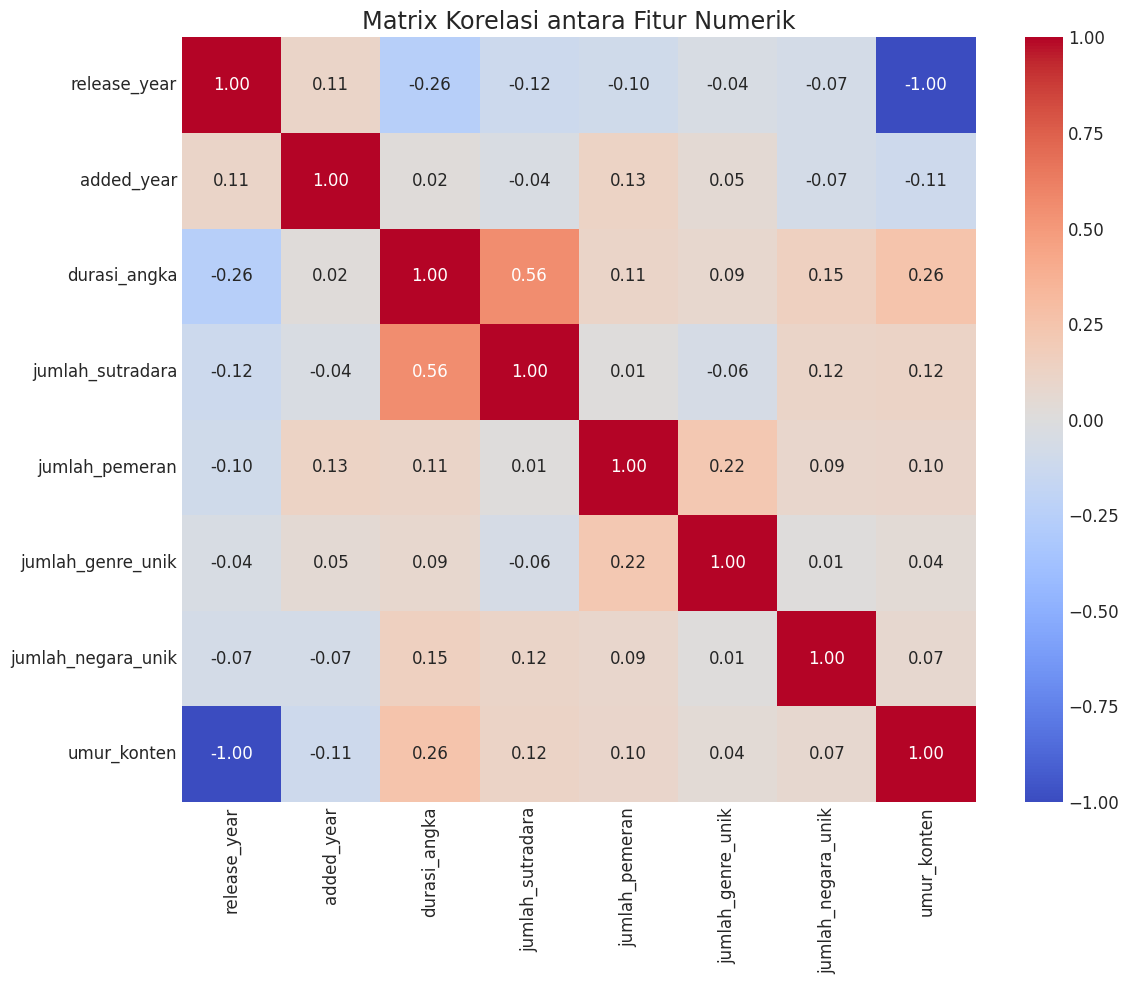

Kolom-kolom setelah penambahan:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'tanggal_ditambahkan', 'tahun_tambah', 'bulan_tambah', 'nama_bulan',
       'durasi_angka', 'durasi_jenis', 'jumlah_sutradara', 'jumlah_pemeran',
       'sutradara_terhitung', 'pemeran_terhitung', 'jumlah_genre_unik',
       'jumlah_negara_unik', 'umur_konten', 'kategori_rating', 'added_year',
       'duration_unit', 'director_count', 'cast_count', 'genre_count',
       'country_count'],
      dtype='object')


In [ ]:
# Memilih fitur numerik untuk korelasi berdasarkan kolom yang ada di dataset
numeric_features = ['release_year', 'added_year', 'durasi_angka',
                    'jumlah_sutradara', 'jumlah_pemeran', 'jumlah_genre_unik',
                    'jumlah_negara_unik', 'umur_konten']


# Menghitung korelasi antar fitur numerik
correlation = df[numeric_features].corr()

# Menampilkan korelasi
print("Korelasi antar fitur numerik:")
print(correlation)

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Korelasi antara Fitur Numerik')
plt.tight_layout()
plt.show()
# Menambahkan kolom baru jika diperlukan
df['director_count'] = df['director'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)
df['country_count'] = df['country'].apply(lambda x: len(str(x).split(', ')) if pd.notna(x) else 0)

# Memastikan kolom-kolom baru telah ditambahkan
print("Kolom-kolom setelah penambahan:")
print(df.columns)



- Membuat Word Cloud untuk Judul Konten...


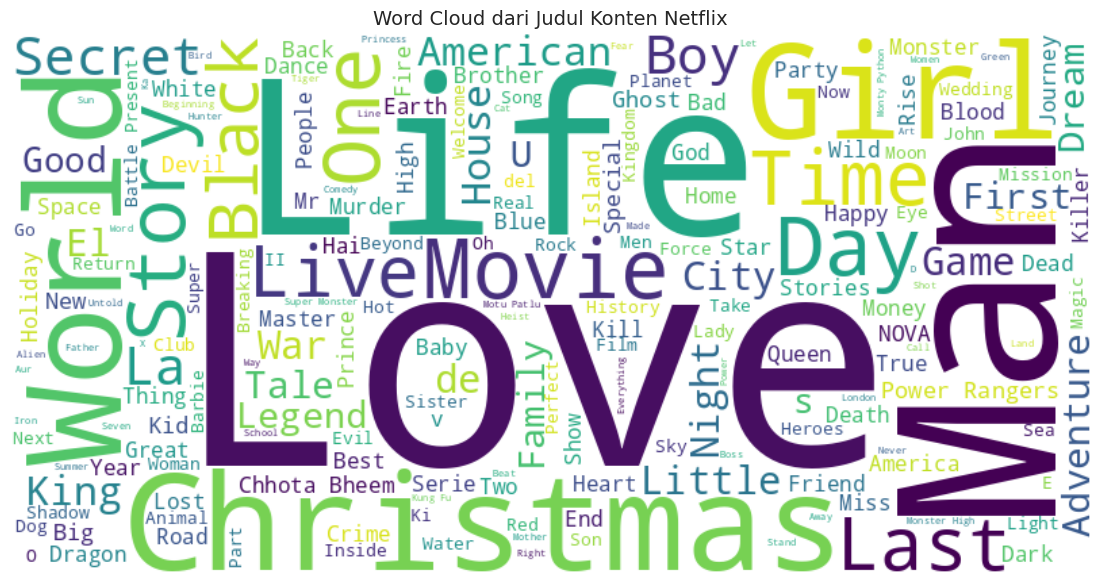

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat Word Cloud untuk judul
print("- Membuat Word Cloud untuk Judul Konten...")

# Menggabungkan semua judul menjadi satu string
title_combined = ' '.join(df['title'].dropna())  # Menangani NaN jika ada

# Membuat word cloud dari judul
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_combined)

# Menampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # Menampilkan wordcloud dengan interpolasi bilinear
plt.axis('off')  # Menonaktifkan sumbu
plt.title('Word Cloud dari Judul Konten Netflix', fontsize=14)
plt.tight_layout()
plt.show()


- Membuat Word Cloud untuk Deskripsi Konten...


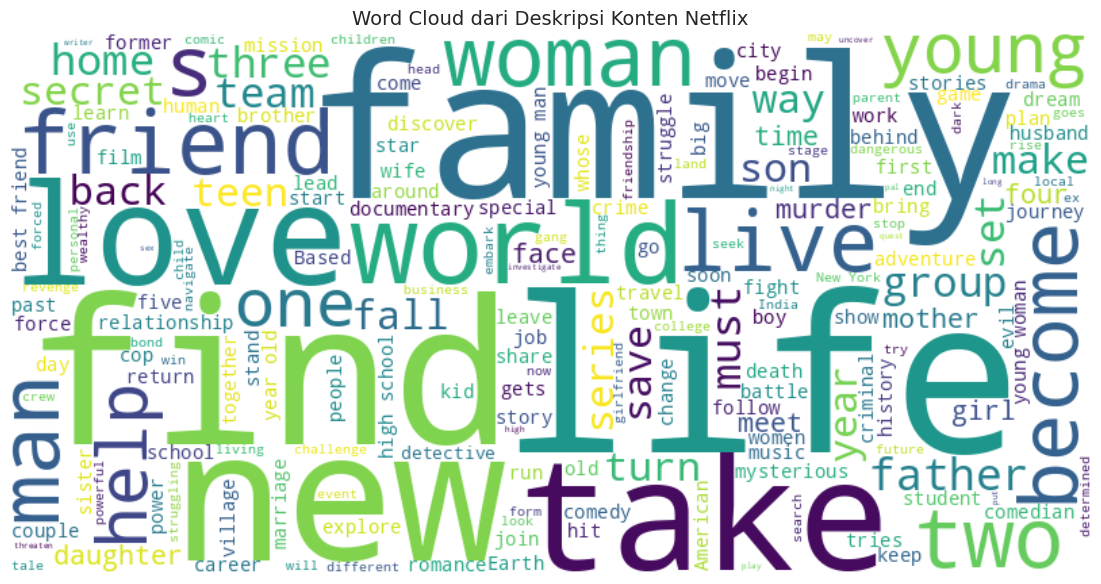

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat Word Cloud untuk deskripsi konten
print("- Membuat Word Cloud untuk Deskripsi Konten...")

# Gabungkan seluruh teks deskripsi menjadi satu string, menangani NaN jika ada
descriptions_combined = ' '.join(df['description'].dropna())  # Menghapus NaN untuk menghindari error

# Membuat word cloud berdasarkan deskripsi
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_combined)

# Menampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # Menampilkan dengan interpolasi bilinear untuk hasil lebih halus
plt.axis('off')  # Menonaktifkan sumbu
plt.title('Word Cloud dari Deskripsi Konten Netflix', fontsize=14)  # Menambahkan judul dengan ukuran font
plt.tight_layout()  # Mengatur layout agar pas
plt.show()


- Menghitung distribusi penambahan konten per bulan...
added_month_name
January      727
February     557
March        734
April        759
May          626
June         724
July         819
August       749
September    765
October      755
November     697
December     797
Name: count, dtype: int64


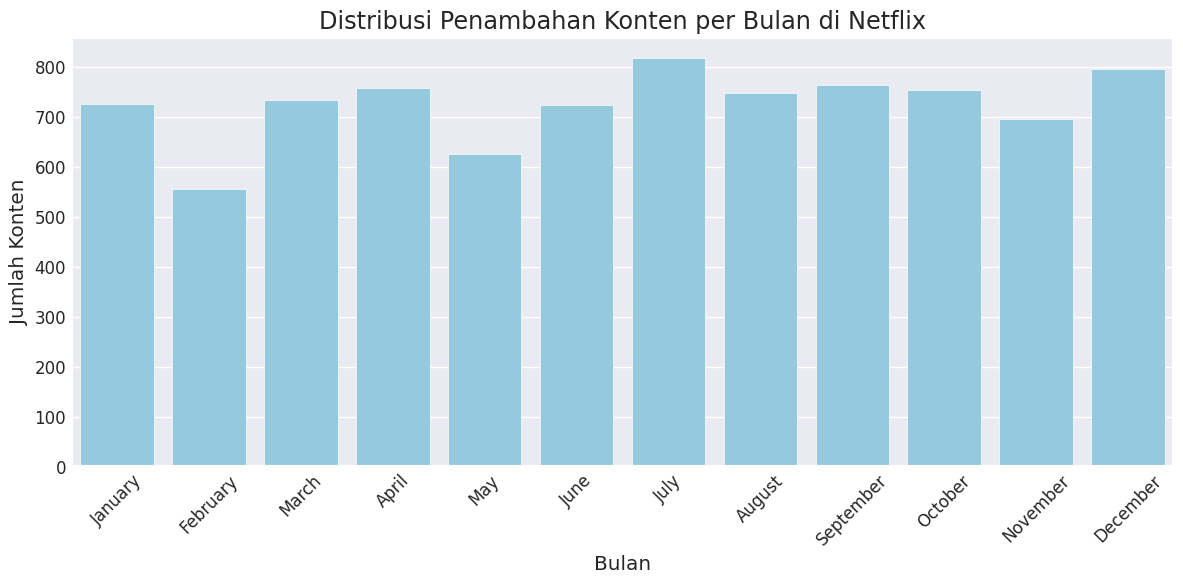

In [ ]:
# Memastikan kolom 'added_month_name' ada
if 'added_month_name' not in df.columns:
    df['added_month_name'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month_name()
# Distribusi Konten per Bulan Penambahan
print("- Menghitung distribusi penambahan konten per bulan...")

# Menghitung jumlah konten per bulan
monthly_additions = df['added_month_name'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

print(monthly_additions)

# Visualisasi distribusi penambahan konten per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, color='skyblue')
plt.title('Distribusi Penambahan Konten per Bulan di Netflix')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Distribusi Jenis Konten per Kategori Rating:
type             Movie  TV Show
kategori_rating                
Anak               167       86
Anak Besar        1102      658
Dewasa            2940     1126
Lainnya              5        2
Remaja            1917      706
- Distribusi Jenis Konten per Kategori Rating dengan Stacked Bar Chart (Persentase):


<Figure size 1200x600 with 0 Axes>

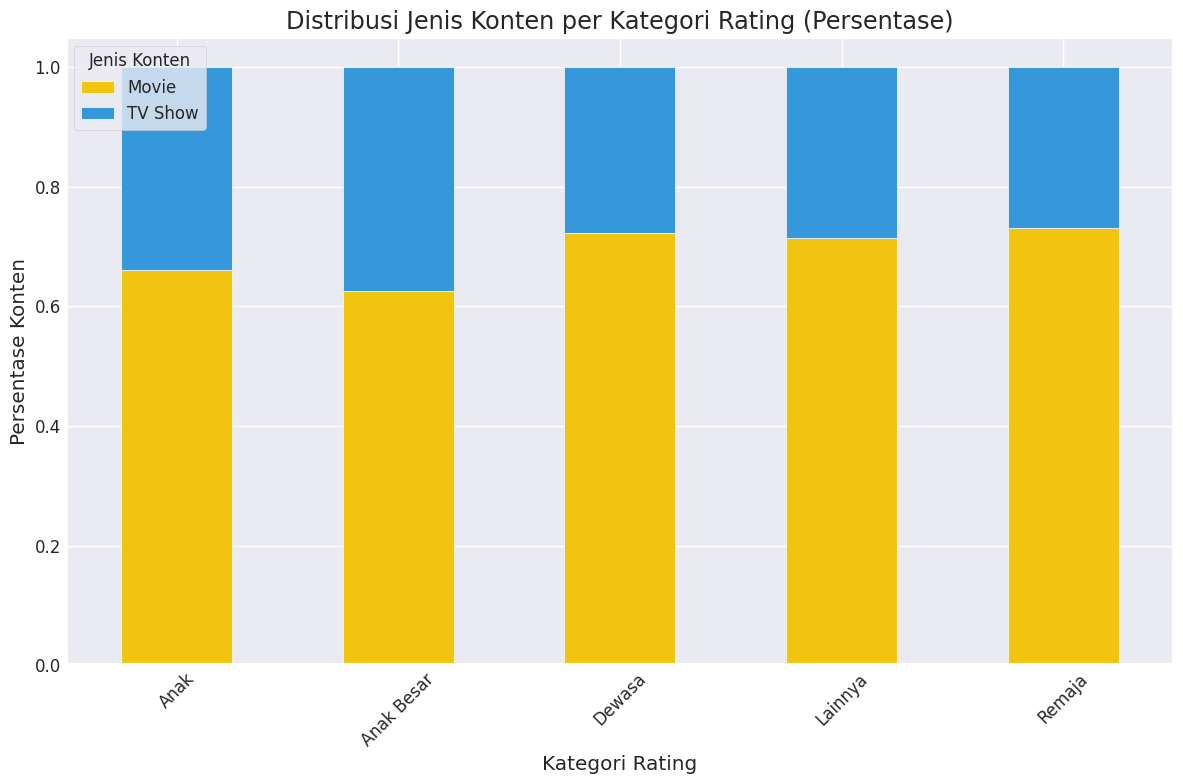

In [ ]:
# Distribusi Jenis Konten berdasarkan Kategori Rating
print("- Distribusi Jenis Konten per Kategori Rating:")

# Membuat pivot table untuk distribusi kategori rating berdasarkan type
rating_type_distribution = df.pivot_table(index='kategori_rating', columns='type', aggfunc='size', fill_value=0)
print(rating_type_distribution)

# Visualisasi distribusi menggunakan bar chart
print("- Distribusi Jenis Konten per Kategori Rating dengan Stacked Bar Chart (Persentase):")

# Normalisasi per kategori rating
rating_type_distribution_normalized = rating_type_distribution.div(rating_type_distribution.sum(axis=1), axis=0)

# Plot Stacked Bar Chart dengan persentase
plt.figure(figsize=(12, 6))
rating_type_distribution_normalized.plot(kind='bar', stacked=True, color=['#f1c40f', '#3498db'])
plt.title('Distribusi Jenis Konten per Kategori Rating (Persentase)')
plt.xlabel('Kategori Rating')
plt.ylabel('Persentase Konten')
plt.xticks(rotation=45)
plt.legend(title='Jenis Konten', loc='upper left')
plt.tight_layout()
plt.show()



      Type  Average Content Age
0    Movie             5.727777
1  TV Show             2.224981


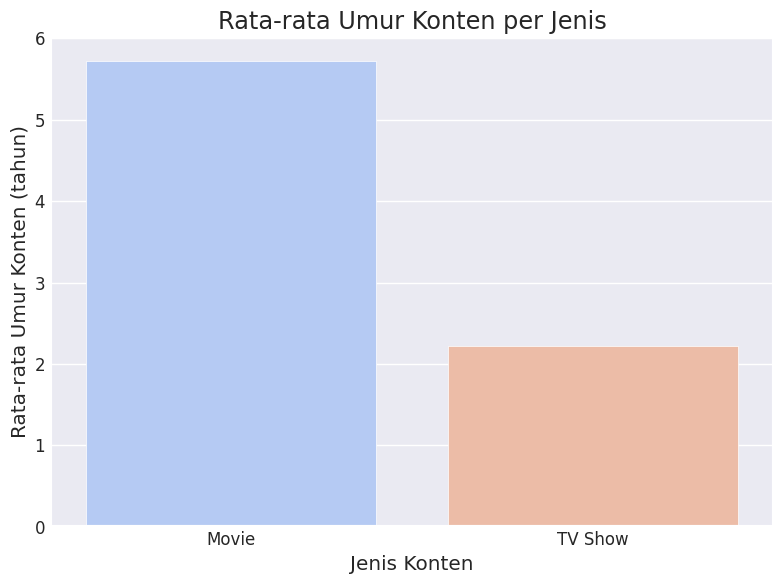

In [ ]:
# Menambahkan kolom 'content_age' sebagai selisih antara tahun penambahan dan tahun rilis
df['content_age'] = df['added_year'] - df['release_year']

# Menghitung rata-rata umur konten per jenis (Movie/TV Show)
avg_content_age = df.groupby('type')['content_age'].agg('mean').reset_index()
avg_content_age.columns = ['Type', 'Average Content Age']  # Rename columns for clarity

# Tampilkan hasil rata-rata umur konten per jenis
print(avg_content_age)

# Visualisasi hasil rata-rata umur konten per jenis
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average Content Age', data=avg_content_age, palette='coolwarm')
plt.title('Rata-rata Umur Konten per Jenis')
plt.xlabel('Jenis Konten')
plt.ylabel('Rata-rata Umur Konten (tahun)')
plt.tight_layout()
plt.show()


- Distribusi Jumlah Cast:


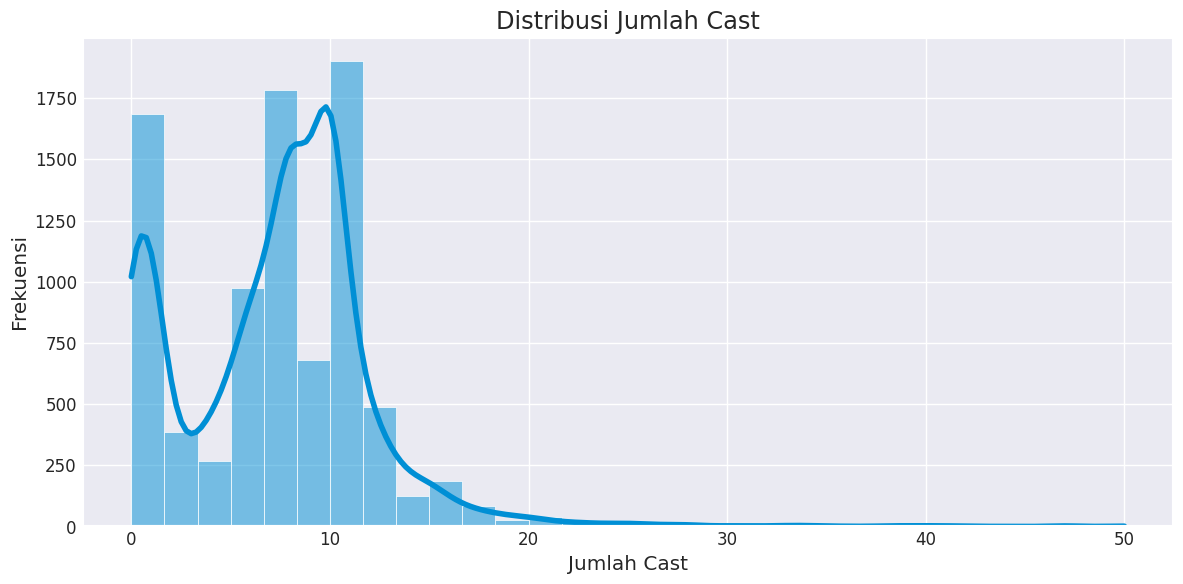

In [ ]:
# Membuat kolom cast_count berdasarkan jumlah cast
df['cast_count'] = df['cast'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(', ')))

# Distribusi Jumlah Cast
print("- Distribusi Jumlah Cast:")
plt.figure(figsize=(12, 6))
sns.histplot(df['cast_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Cast')
plt.xlabel('Jumlah Cast')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


- Box Plot Umur Konten per Rating Category:


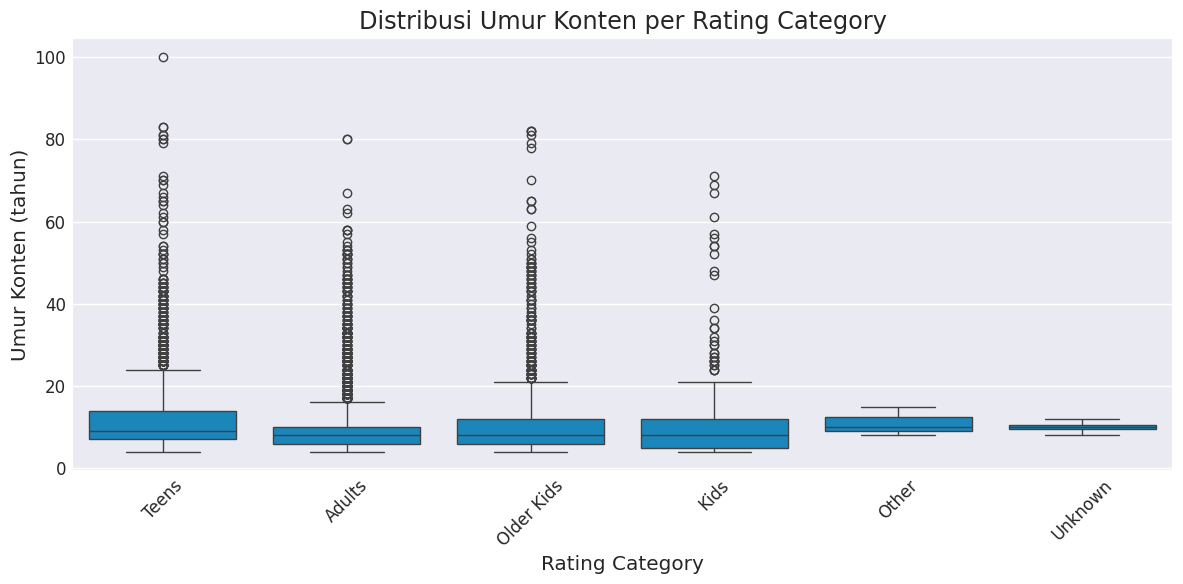

In [ ]:
# Menghitung umur konten
current_year = datetime.now().year
df['content_age'] = current_year - df['release_year']

def categorize_rating(rating):
    """Mengategorikan rating menjadi kelompok usia"""
    if pd.isna(rating):
        return 'Unknown'
    elif rating in ['G', 'TV-G']:
        return 'Kids'
    elif rating in ['PG', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']:
        return 'Older Kids'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['R', 'TV-MA', 'NC-17', 'UR', 'NR']:
        return 'Adults'
    else:
        return 'Other'

df['rating_category'] = df['rating'].apply(categorize_rating)

# Box Plot Umur Konten per Rating Category
print("- Box Plot Umur Konten per Rating Category:")
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating_category', y='content_age', data=df)
plt.title('Distribusi Umur Konten per Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Umur Konten (tahun)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Memeriksa distribusi Movie dan TV Show berdasarkan tahun penambahan:
type        Movie  TV Show
added_year                
2012.0          3        0
2013.0          6        4
2014.0         19        4
2015.0         56       17
2016.0        253      165
2017.0        839      325
2018.0       1237      388
2019.0       1424      575
2020.0       1284      594
2021.0        993      505


<Figure size 1400x600 with 0 Axes>

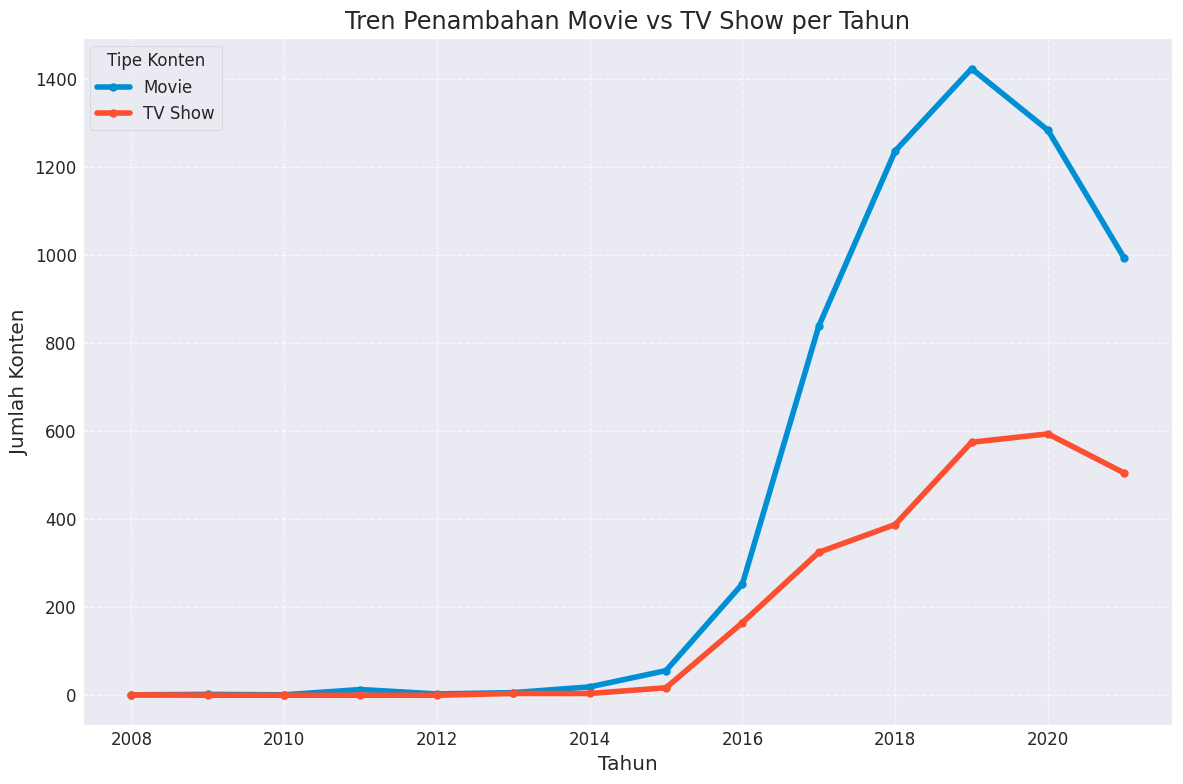

In [ ]:
# Trend Jumlah Movie vs TV Show per Tahun - Versi Baru
print("- Memeriksa distribusi Movie dan TV Show berdasarkan tahun penambahan:")

# Menyaring data berdasarkan tahun dan type konten
year_type_distribution = df[['added_year', 'type']].dropna(subset=['added_year', 'type'])
year_type_distribution = year_type_distribution.groupby(['added_year', 'type']).size().unstack(fill_value=0)

# Menampilkan 10 tahun terakhir
print(year_type_distribution.tail(10))

# Visualisasi tren jumlah Movie vs TV Show per tahun
plt.figure(figsize=(14, 6))
year_type_distribution.plot(kind='line', marker='o', linestyle='-', markersize=5)
plt.title('Tren Penambahan Movie vs TV Show per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.legend(title='Tipe Konten', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
